In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [60]:
def get_time_features(window_ch1,window_ch2):
    features = []
    for ch in [window_ch1, window_ch2]:
        rms = np.sqrt(np.mean(ch**2))
        mav = np.mean(np.abs(ch))
        zc = np.sum(np.diff(np.sign(ch-np.mean(ch))) != 0)
        wl = np.sum(np.abs(np.diff(ch)))
        ssc = np.sum(np.diff(np.sign(np.diff(ch))) != 0)
        mean = np.mean(ch)
        std = np.std(ch)
        var = np.var(ch)
        features.extend([rms, mav, zc, wl, ssc, mean, std, var])
    return features

In [61]:
Window_size = 250
Step_size = 10
def segment_and_extract(dataframe):
    feat_matrix = []
    label_list = []

    for lbl in dataframe['label'].unique():
        segment = dataframe[dataframe['label'] == lbl].reset_index(drop=True)
        for i in range(0, len(segment) - Window_size + 1, Step_size):
            window = segment.iloc[i:i + Window_size]

            feat_matrix.append(get_time_features(window['ch1'], window['ch2']))
            label_list.append(lbl)

    feature_names = [
        'rms_ch1', 'mav_ch1', 'zc_ch1', 'wl_ch1', 'ssc_ch1', 'mean_ch1', 'std_ch1', 'var_ch1',
        'rms_ch2', 'mav_ch2', 'zc_ch2', 'wl_ch2', 'ssc_ch2', 'mean_ch2', 'std_ch2', 'var_ch2'
    ]

    return pd.DataFrame(feat_matrix, columns=feature_names).assign(label=label_list)

In [51]:
gesture_list = [
    'rest', 'fist', 'peace', 'thumb', 'clenched', 'okay',
    'rock', 'four', 'index_finger', 'spread', 'three', 'up'
]

dataframes = []
for gesture in gesture_list:
    df = pd.read_csv(f"{gesture}_data.csv")
    if df.shape[1] == 2:
        df.columns = ['ch1', 'ch2']
    df['label'] = gesture
    dataframes.append(df)

full_data = pd.concat(dataframes, ignore_index=True)

features_df = segment_and_extract(full_data)
features_df.head()

,rms_ch1,mav_ch1,zc_ch1,wl_ch1,ssc_ch1,mean_ch1,std_ch1,var_ch1,rms_ch2,mav_ch2,zc_ch2,wl_ch2,ssc_ch2,mean_ch2,std_ch2,var_ch2,label
0,523.800099,523.600,120,3985,163,523.600,14.477016,209.584000,505.583833,505.388,130,4207,165,505.388,14.070588,197.981456,rest
1,523.813238,523.612,119,3899,163,523.612,14.518315,210.781456,505.787165,505.592,130,4236,167,505.592,14.049396,197.385536,rest
2,523.957872,523.764,116,3780,162,523.764,14.252168,203.124304,505.864088,505.668,130,4252,170,505.668,14.083671,198.349776,rest
3,523.623082,523.428,117,3843,162,523.428,14.291984,204.260816,505.964007,505.760,133,4358,170,505.760,14.366572,206.398400,rest
4,523.525514,523.332,117,3849,165,523.332,14.233122,202.581776,506.054527,505.856,134,4288,170,505.856,14.173612,200.891264,rest


In [52]:
X = features_df.drop(columns='label')
y = LabelEncoder().fit_transform(features_df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5184, 16) (1728, 16) (5184,) (1728,)


In [53]:
model_defs = {
    'SVM': SVC(kernel='rbf', C=50, gamma='scale', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3, weights='distance'),
    'Logistic Regression': LogisticRegression(solver='saga', C=10, max_iter=1000, multi_class='multinomial', random_state=42)
}



SVM
Accuracy: 90.05%
              precision    recall  f1-score   support

        rest       0.88      0.89      0.88       144
        fist       0.82      0.90      0.86       144
       peace       0.91      0.94      0.92       144
       thumb       0.91      0.90      0.91       144
    clenched       0.89      0.92      0.90       144
        okay       0.90      0.94      0.92       144
        rock       0.94      0.92      0.93       144
        four       0.92      0.85      0.88       144
index_finger       0.90      0.90      0.90       144
      spread       0.92      0.89      0.90       144
       three       0.89      0.92      0.90       144
          up       0.95      0.85      0.90       144

    accuracy                           0.90      1728
   macro avg       0.90      0.90      0.90      1728
weighted avg       0.90      0.90      0.90      1728



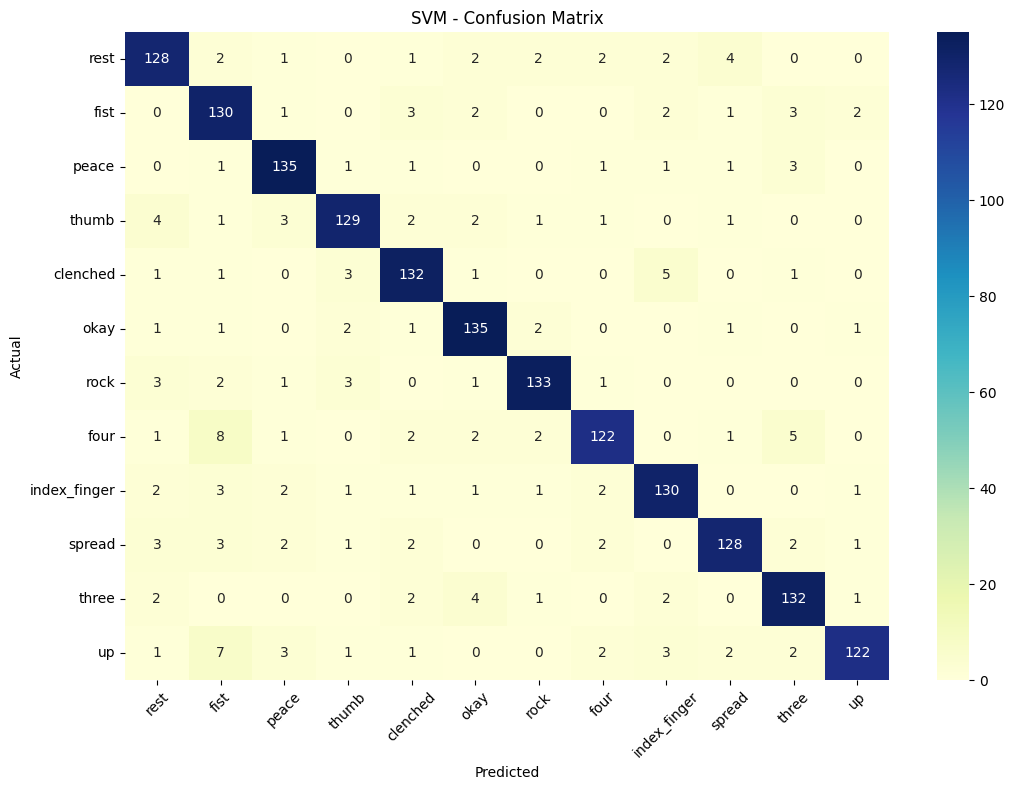


KNN
Accuracy: 93.52%
              precision    recall  f1-score   support

        rest       0.91      0.96      0.94       144
        fist       0.91      0.89      0.90       144
       peace       0.96      0.95      0.96       144
       thumb       0.96      0.93      0.94       144
    clenched       0.94      0.91      0.92       144
        okay       0.93      0.94      0.93       144
        rock       0.95      0.98      0.96       144
        four       0.94      0.95      0.94       144
index_finger       0.96      0.93      0.95       144
      spread       0.96      0.91      0.93       144
       three       0.90      0.92      0.91       144
          up       0.91      0.95      0.93       144

    accuracy                           0.94      1728
   macro avg       0.94      0.94      0.94      1728
weighted avg       0.94      0.94      0.94      1728



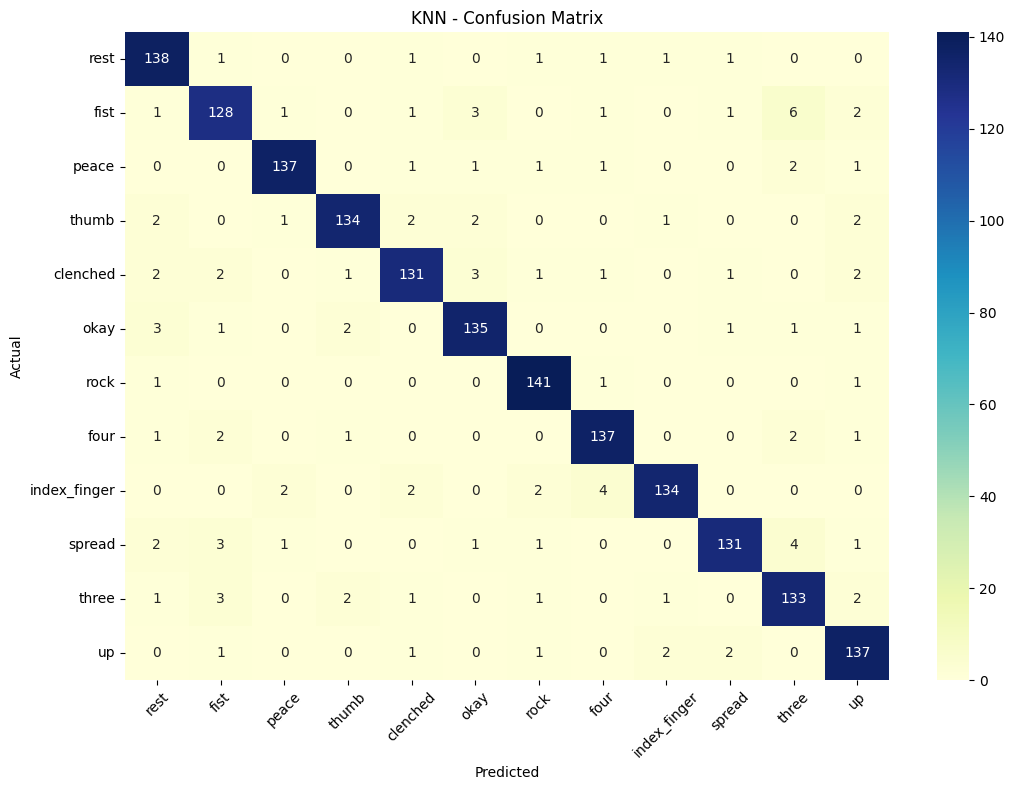

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Logistic Regression
Accuracy: 17.77%
              precision    recall  f1-score   support

        rest       0.12      0.06      0.08       144
        fist       0.21      0.29      0.24       144
       peace       0.20      0.35      0.25       144
       thumb       0.14      0.08      0.10       144
    clenched       0.18      0.07      0.10       144
        okay       0.23      0.31      0.26       144
        rock       0.17      0.21      0.19       144
        four       0.22      0.26      0.24       144
index_finger       0.17      0.23      0.19       144
      spread       0.10      0.08      0.09       144
       three       0.18      0.15      0.17       144
          up       0.07      0.04      0.05       144

    accuracy                           0.18      1728
   macro avg       0.16      0.18      0.16      1728
weighted avg       0.16      0.18      0.16      1728



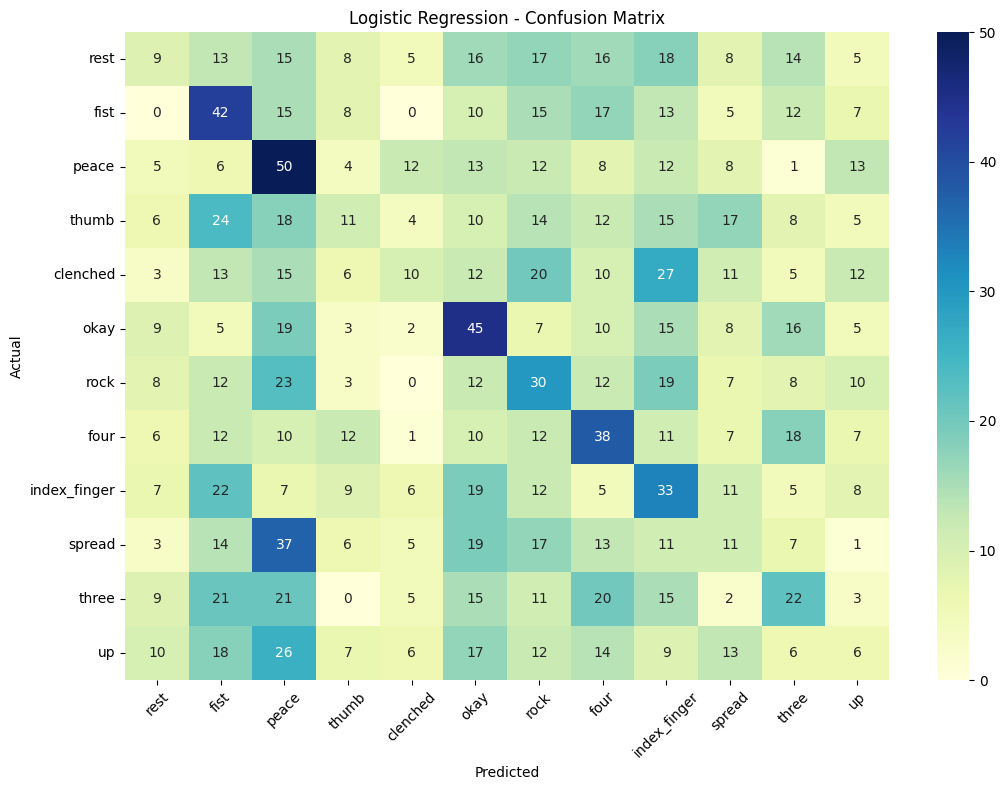

In [62]:
performance = {}

for model_name, model in model_defs.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    performance[model_name] = accuracy

    print(f"\n{model_name}")
    print(f"Accuracy: {accuracy:.2%}")
    print(classification_report(y_test, y_pred, target_names=gesture_list))
    cmatrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(11, 8))
    sns.heatmap(cmatrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=gesture_list, yticklabels=gesture_list)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [63]:
print("\nFinal Accuracy Summary:")
for model, score in sorted(performance.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {score:.2%}")


Final Accuracy Summary:
KNN: 93.52%
SVM: 90.05%
Logistic Regression: 17.77%
